# Глубокая нейронная сеть для классификации изображений: на основе pytorch

# 1. Подготовка данных

In [7]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from dnn_app_utils_v3 import load_data

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
print(train_x_orig.shape, train_y.shape, test_x_orig.shape, test_y.shape)

train_x = torch.from_numpy(train_x_orig.reshape(-1, 64 * 64 * 3)).type(torch.float32) / 255.
test_x = torch.from_numpy(test_x_orig.reshape(-1, 64 * 64 * 3)).type(torch.float32) / 255.
train_y = torch.from_numpy(train_y.reshape(-1, 1)).type(torch.float32)
test_y = torch.from_numpy(test_y.reshape(-1, 1)).type(torch.float32)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(209, 64, 64, 3) (1, 209) (50, 64, 64, 3) (1, 50)
torch.Size([209, 12288]) torch.Size([209, 1]) torch.Size([50, 12288]) torch.Size([50, 1])


In [10]:
train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

# 2. Архитектура нейросети

In [11]:
import torch.nn as nn
n_x = 12288     # num_px * num_px * 3
n_h = 25
n_y = 1
model = nn.Sequential(nn.Linear(n_x, n_h), nn.ReLU(), nn.Linear(n_h, n_y),nn.Sigmoid())
model

Sequential(
  (0): Linear(in_features=12288, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=1, bias=True)
  (3): Sigmoid()
)

# 3. Loss & optimizer

In [12]:
criterion = nn.BCELoss()
learning_rate = 0.0075
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 4. Обучение (доделать.....)

In [22]:
n_epoch = 1000
for epoch in range(n_epoch):
    for x, y in train_loader:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out,y)
        loss.backward()
        optimizer.step()
        y_hat = torch.round(out)
#         print(f"ephoch {epoch+1} cost {loss.item()} accuracy {torch.eq(y_hat, y).sum()*100/y.size()[0]} %")

In [23]:
with torch.no_grad():
    for x_test , y_test in test_loader:
        y_pred = model(x_test)
        y_hat = torch.round(y_pred)
        print(f"accuracy {torch.eq(y_hat, y_test).sum()*100/y_test.size()[0]} %")
    

accuracy 74.0 %


# L-слойная нейронная сеть

In [17]:
import gradio as gr
import numpy as np

In [25]:
def sepia (input_img):
    predict = torch.round(model(torch.tensor(input_img.reshape(-1, 64 * 64 * 3),dtype=torch.float32)/ 255.)[0,0])
    print(torch.tensor(input_img.reshape(-1, 64 * 64 * 3),dtype=torch.float64))
    if predict==1:
        return input_img,"это кошка"
    else:
        return input_img,"это вообще не кот"
    # sepia_img = input_img.dot(sepia_filter.T)
    # sepia_img /= sepia_img.max()
    # return sepia_img

demo = gr.Interface(sepia,inputs=gr.Image(shape=(64, 64)), outputs=[gr.Image(shape=(64, 64)),"text"])
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7867

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


tensor([[ 93., 102.,  35.,  ..., 151., 143., 137.]], dtype=torch.float64)


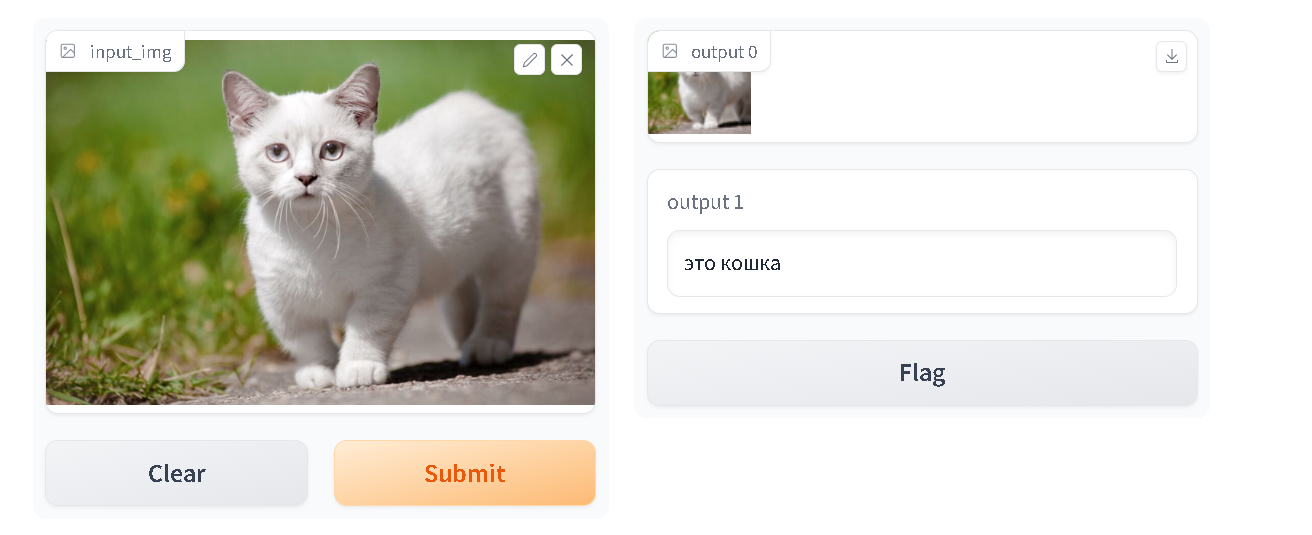

In [27]:
from IPython import display
display.Image("image3.png")

In [26]:
demo.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

To create a public link, set `share=True` in `launch()`.


tensor([[121., 153.,  61.,  ..., 206., 197., 169.]], dtype=torch.float64)


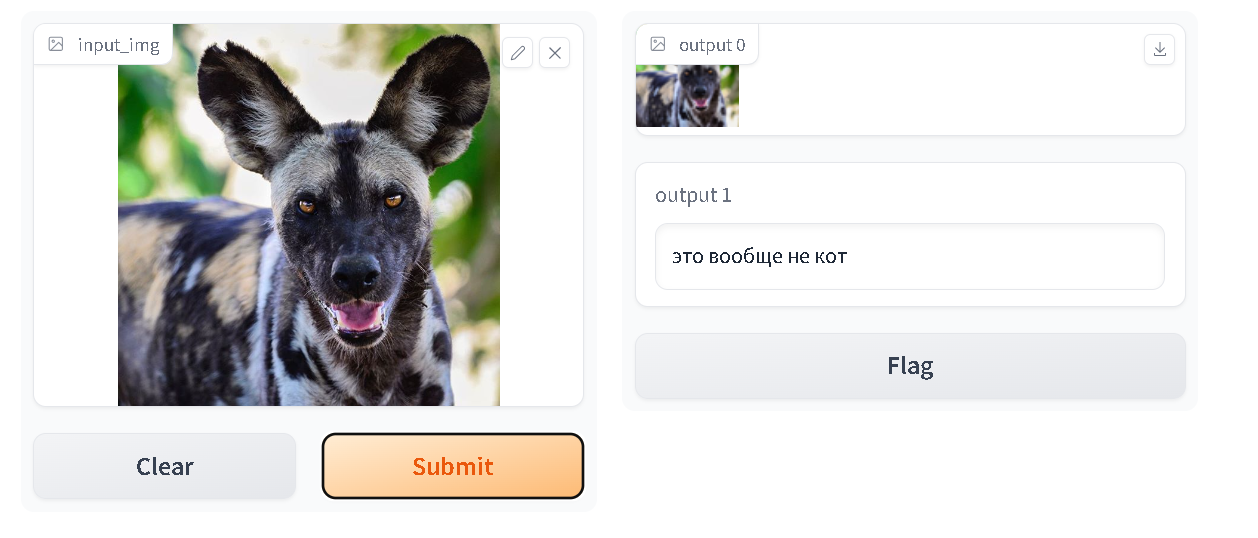

In [28]:
display.Image("image4.png")